# Segmentación de los datos

A mi me gusta poner todos los imports arriba de todo

In [1]:
import pandas as pd

In [2]:
# -1 muestra el texto completo
# set_option('display.max_colwidth', -1) 

## Levantamos los datos etiquetados

Para que tengan un poco de contexto, los datos fueron sacados de una competencia internacional, la SemEval 2016 Task 6. Les dejo acá la página por si quieren ver qué hicieron los competidores con estos datos, los análisis de los dataset y los resultados (busquen el paper de la competencia) y información general: http://alt.qcri.org/semeval2016/task6/

In [3]:
train = pd.read_csv("train.csv", sep=",", encoding="latin1").fillna(method="ffill")
test = pd.read_csv("test.csv", sep=",", encoding="latin1").fillna(method="ffill")

Vemos los datos que levantamos. Yo lo dejo hecho para Train y ustedes hacen lo mismo para Test:

In [4]:
train.head(5) #Si quieren ver mas cambian el parametro de 5 a lo que quieran

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


Contamos cuantos tweets hay para cada stance y para cada target. Es importante ver si las clases están balanceadas y si hay desbalance cuan pronunciado es y hacia qué clase. Notar qué sucede por ejemplo con Climate Change, que vamos a usar después.

In [5]:
stances = train.groupby(["Target", "Stance"]).size()
stances

Target                            Stance 
Atheism                           AGAINST    304
                                  FAVOR       92
                                  NONE       117
Climate Change is a Real Concern  AGAINST     15
                                  FAVOR      212
                                  NONE       168
Feminist Movement                 AGAINST    328
                                  FAVOR      210
                                  NONE       126
Hillary Clinton                   AGAINST    393
                                  FAVOR      118
                                  NONE       178
Legalization of Abortion          AGAINST    355
                                  FAVOR      121
                                  NONE       177
dtype: int64

La función describe nos da estadísticas generales del dataset

In [6]:
train.describe(include = 'all')

,Tweet,Target,Stance,Opinion Towards,Sentiment
count,2914,2914,2914,2914,2914
unique,2914,5,3,3,3
top,"Thank you to all our 300 followers, helping us...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
freq,1,689,1395,1716,1762


Nosotros vamos a trabajar sobre todo con la columna "Stance" como nuestra etiqueta, pero exploremos las otras dos (Opinion y Sentiment) para ver qué información tienen...

In [7]:
train["Opinion Towards"].unique()

array(['1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.',
       '3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)',
       '2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.'],
      dtype=object)

In [8]:
train["Opinion Towards"].value_counts(normalize = True)

1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.                   0.588881
2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.    0.351407
3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)                       0.059712
Name: Opinion Towards, dtype: float64

In [9]:
train["Opinion Towards"].value_counts()

1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.                   1716
2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.    1024
3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)                        174
Name: Opinion Towards, dtype: int64

Prueben filtrar por valores y buscar combinaciones que les puedan parecer interesantes. Por ejemplo, acá buscamos tweets que no tengan un posicionamiento definido respecto al tópico pero que sin embargo expresen opinion

In [10]:
train[(train["Stance"] == "NONE")][train["Opinion Towards"] == "1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target."]

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Tweet,Target,Stance,Opinion Towards,Sentiment
346,atheism involves what a person does or does no...,Atheism,NONE,1. The tweet explicitly expresses opinion abo...,other
762,@realDonaldTrump - You are not very smart Dona...,Climate Change is a Real Concern,NONE,1. The tweet explicitly expresses opinion abo...,neg
816,"We need to work with confidence, transparence ...",Climate Change is a Real Concern,NONE,1. The tweet explicitly expresses opinion abo...,pos
1129,"Hey, all you #prolife-ers, if Socrates was bor...",Feminist Movement,NONE,1. The tweet explicitly expresses opinion abo...,neg
1174,.@cooImemegirl @TC_Stompa So what? It is a man...,Feminist Movement,NONE,1. The tweet explicitly expresses opinion abo...,neg
1410,@E__Strobel @rsmccain @instapundit @CHSommers ...,Feminist Movement,NONE,1. The tweet explicitly expresses opinion abo...,neg
1626,@orange_kae a lot of people get indoctrinated ...,Feminist Movement,NONE,1. The tweet explicitly expresses opinion abo...,other
2510,@charlescwcooke @HillaryClinton Once they're b...,Legalization of Abortion,NONE,1. The tweet explicitly expresses opinion abo...,other
2752,RT @modernwerewolf: Why doesn't anyone congrat...,Legalization of Abortion,NONE,1. The tweet explicitly expresses opinion abo...,neg


Tweets que tengan un posicionamiento definido pero que el Tweet no exprese opinion. 

In [11]:
train[(train["Stance"] != 'NONE')][train["Opinion Towards"] == "3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)"]
# train[(train["Stance"] == "NONE")][train["Opinion Towards"] == "1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target."]

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Tweet,Target,Stance,Opinion Towards,Sentiment
230,"Faithful God, we #pray that we may learn to tr...",Atheism,AGAINST,3. The tweet is not explicitly expressing opi...,pos
257,Zubair Ibn Awwam accepted #Islam at the age of...,Atheism,AGAINST,3. The tweet is not explicitly expressing opi...,pos
505,Faith is being in the impossibilities that we ...,Atheism,AGAINST,3. The tweet is not explicitly expressing opi...,pos
529,"You can have everything in this life, but as l...",Atheism,AGAINST,3. The tweet is not explicitly expressing opi...,pos
601,Romans 15:1 We who are powerful need to be pat...,Atheism,AGAINST,3. The tweet is not explicitly expressing opi...,pos
617,@davidswann says he wants carbon fund to be sp...,Climate Change is a Real Concern,FAVOR,3. The tweet is not explicitly expressing opi...,other
786,RT @abhinav_khanal: 700 people dead in Pakista...,Climate Change is a Real Concern,FAVOR,3. The tweet is not explicitly expressing opi...,neg
791,Inland so cal has been hot and humid all day. ...,Climate Change is a Real Concern,FAVOR,3. The tweet is not explicitly expressing opi...,neg
810,"All eyes on China, reports @ClimateNexus - pl...",Climate Change is a Real Concern,FAVOR,3. The tweet is not explicitly expressing opi...,other
811,"Reading: ""The Whale and the Supercomputer. On ...",Climate Change is a Real Concern,FAVOR,3. The tweet is not explicitly expressing opi...,pos


## Ejercicio 1

Hacer todo lo que está hecho arriba pero para el dataset de test. Observar bien la distribución de las clases en el dataset (especialmente para el Target Climate Change) y calcular los porcentajes de cada clase. Escribir un parrafito mencionando cuales son los targets con mayor y menor desbalanceo, cómo piensan que esto puede afectar futuros experimentos e ideas que tengan para solucionar posibles problemas

In [12]:
test.head(5)

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,He who exalts himself shall be humbled; a...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
1,RT @prayerbullets: I remove Nehushtan -previou...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,other
2,@Brainman365 @heidtjj @BenjaminLives I have so...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,pos
3,#God is utterly powerless without Human interv...,Atheism,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@David_Cameron Miracles of #Multiculturalism...,Atheism,AGAINST,2. The tweet does NOT expresses opinion about ...,neg


In [13]:
test.describe(include = 'all')

,Tweet,Target,Stance,Opinion Towards,Sentiment
count,1956,1956,1956,1956,1956
unique,1956,6,3,3,3
top,I'm a co-omnipotent-faux-fallacious-poly-concu...,Donald Trump,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
freq,1,707,1014,1148,1272


In [14]:
# podria usar count() en lugar de size(), pero me muestra todas las columnas.
test_stances = test.groupby(["Target", "Stance"]).size()
test_stances

Target                            Stance 
Atheism                           AGAINST    160
                                  FAVOR       32
                                  NONE        28
Climate Change is a Real Concern  AGAINST     11
                                  FAVOR      123
                                  NONE        35
Donald Trump                      AGAINST    299
                                  FAVOR      148
                                  NONE       260
Feminist Movement                 AGAINST    183
                                  FAVOR       58
                                  NONE        44
Hillary Clinton                   AGAINST    172
                                  FAVOR       45
                                  NONE        78
Legalization of Abortion          AGAINST    189
                                  FAVOR       46
                                  NONE        45
dtype: int64

In [15]:
pd.concat([test_stances.rename('Test'), stances.rename('Train')], axis=1).reset_index()

,Target,Stance,Test,Train
0,Atheism,AGAINST,160,304.0
1,Atheism,FAVOR,32,92.0
2,Atheism,NONE,28,117.0
3,Climate Change is a Real Concern,AGAINST,11,15.0
4,Climate Change is a Real Concern,FAVOR,123,212.0
5,Climate Change is a Real Concern,NONE,35,168.0
6,Donald Trump,AGAINST,299,NaN
7,Donald Trump,FAVOR,148,NaN
8,Donald Trump,NONE,260,NaN
9,Feminist Movement,AGAINST,183,328.0


Porque tenemos Donald Trump en test y no en train??

En el dataset Train, la clase mas balanceada es "Feminism Movement", y la mas desbalanceada, "Climate Change"

"Donald Trump" es la clase mas balanceada, y las mas desbalanceadas son "Atheism" y "Climate Change".

Entiendo que mientras mas datos tengamos para test o para train, vamos a lograr mejores resultados, (o por lo menos tendriamos un mejor entrenamiento y posterior test.) 

Pero como afectara eso???

#### Calculamos los % de cada Clase

In [16]:
target_percentage = test["Target"].value_counts(normalize = True)
target_counts = test["Target"].value_counts()

pd.concat([target_percentage.rename('%'), target_counts.rename('size')], axis=1).reset_index()

,index,%,size
0,Donald Trump,0.361452,707
1,Hillary Clinton,0.150818,295
2,Feminist Movement,0.145706,285
3,Legalization of Abortion,0.143149,280
4,Atheism,0.112474,220
5,Climate Change is a Real Concern,0.086401,169


### Yapa del Ejercicio 1

Observen esto... qué opinan?

In [17]:
abortion = test[test["Target"] == "Legalization of Abortion"]
print(abortion.loc[982]["Tweet"], abortion.loc[982]["Stance"])

Those who deny women who've been raped abortion are the same ppl who tell rape victims they asked for it. #rape #SemST AGAINST


Anécdota: cuando empezamos a trabajar con este dataset descubrimos que había un 28% del dataset de test de aborto, un 10% del dataset de train de feminismo y un 16% del dataset de test de feminismo que estaban obsenamente mal clasificados. Todos los que compitieron en la competencia internacional lo hicieron con este dataset incorrecto y nadie lo notó... Nadie se tomó el trabajo de leer los tweets o ver por qué les daban mal las clasificaciones. En la carpeta "Para después del ejercicio 1" van a encontrar tres archivos con los datasets de train y test para feminismo corregidos y test para aborto corregidos. En esta notebook yo voy a seguir trabajando con los datasets originales ya que no debería cambiar mucho los resultados a los efectos de este trabajo. Pero para los siguientes trabajos, les va a cambiar el resultado de sus clasificadores si usan o no usan los datasets corregidos.

# Un poquito twitter pelado

Vamos a empezar a trabajar con los datos de twitter sin etiquetar. Vamos a usar los archivos .csv que compartió Matías levantados del mongo (así no tienen que pelearse con mongo). Si son muy pesados y les vuelven lenta la máquina pueden eliminar la mitad, tres cuartos o la cantidad que necesiten de tweets y trabajar con un dataset más chico. También pueden eliminar campos una vez que hayan importado el archivo (ahora vamos a ver como) dado que en principio vamos a trabajar sólo con tweet.full_text, tweet.retweeted_status.full_text, tweet.user.id_str, y tweet.retweeted_status.user.id_str. Para esta parte, peguen los archivos que mandó Matías en la misma carpeta que esta notebook

In [2]:
# abortion = pd.read_csv("../data/tweets/abortion_tweets.csv", usecols=["tweet.full_text","tweet.text","tweet.extended_tweet.full_text","tweet.retweeted_status.text"])
# feminism = pd.read_csv("../data/tweets/feminism_tweets.csv", usecols=["tweet.full_text","tweet.text","tweet.extended_tweet.full_text","tweet.retweeted_status.text"])
# climate_change = pd.read_csv("../data/climate-change_tweets.csv", usecols=["tweet.full_text","tweet.text","tweet.extended_tweet.full_text","tweet.retweeted_status.text"])
abortion = pd.read_csv("../data/tweets/abortion_tweets.csv")

/home/matias/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,6,20,24,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
abortion

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,...,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet
0,ObjectId(5dc083fbe36ea093ac65d196),abortion,Mon Nov 04 20:02:48 +0000 2019,1191445712841650183,RT @MikeH_PR: The fictitious Labour account ap...,NaN,NaN,"[0,140]","{""hashtags"":[{""text"":""repealthe8th"",""indices"":...",396810997,...,21646.0,2870.0,390.0,NaN,140189.0,Wed Jan 26 15:45:32 +0000 2011,2.432240e+08,False,NaN,NaN
1,ObjectId(5dc083fbe36ea093ac65d198),abortion,Mon Nov 04 20:02:46 +0000 2019,1191445702796333056,"RT @NARAL: This week, the U.S. Ambassador to t...",NaN,NaN,"[0,139]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",244580614,...,199167.0,6022.0,2908.0,NaN,58424.0,Mon Oct 27 20:11:49 +0000 2008,1.700604e+07,False,NaN,NaN
2,ObjectId(5dc083fbe36ea093ac65d19e),abortion,Mon Nov 04 20:02:38 +0000 2019,1191445671552966657,RT @letthemliveorg: URGENT: Help us cancel an ...,NaN,NaN,"[0,111]","{""hashtags"":[{""text"":""ProLife"",""indices"":[79,8...",866309180088602626,...,13698.0,1259.0,25.0,NaN,820.0,Wed Mar 07 02:37:10 +0000 2018,9.712131e+17,False,NaN,NaN
3,ObjectId(5dc083fbe36ea093ac65d1c6),abortion,Mon Nov 04 20:01:47 +0000 2019,1191445455286222852,Writing an essay on what philosophers have to ...,NaN,NaN,"[0,69]","{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",477959459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ObjectId(5dc083fbe36ea093ac65d1c8),abortion,Mon Nov 04 20:01:46 +0000 2019,1191445453373628416,@rn_gal @OpalescentMoon @realDonaldTrump Killi...,NaN,NaN,"[41,321]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",1030972456620711936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613545,ObjectId(5dcdb6bfee0a4baf1b071ffe),streaming,Thu Nov 14 20:19:06 +0000 2019,1195073692436447232,NaN,If you're interested in seeing how fake women'...,If you're interested in seeing how fake women'...,NaN,"{""hashtags"":[],""urls"":[{""url"":""https://t.co/a4...",15443890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613546,ObjectId(5dcdb6bfee0a4baf1b072000),streaming,Thu Nov 14 20:19:06 +0000 2019,1195073693967245312,NaN,RT @PPMO_Advocates: @GovMikeParson @DocMcnick ...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",275714700,...,4163.0,720.0,109.0,NaN,16117.0,Thu Jul 01 19:07:38 +0000 2010,1.617778e+08,NaN,NaN,"{""full_text"":""@GovMikeParson @DocMcnick - (Sho..."
613547,ObjectId(5dcdb6c0ee0a4baf1b072002),streaming,Thu Nov 14 20:19:07 +0000 2019,1195073696911609856,NaN,"RT @ilyseh: ....Aaaaannnnnddd, Matt Bevin conc...",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",2242671698,...,50217.0,6117.0,982.0,NaN,27509.0,Tue Jul 31 22:38:48 +0000 2007,7.860902e+06,NaN,NaN,"{""full_text"":""....Aaaaannnnnddd, Matt Bevin co..."
613548,ObjectId(5dcdb6c1ee0a4baf1b072004),streaming,Thu Nov 14 20:19:07 +0000 2019,1195073699428352000,NaN,Leana Wen really have the anti-abortion moveme...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""s...",145071750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(abortion["tweet.full_text"].unique())

95887

Hay tweets repetidos! Por supuesto, muchos son retweets y aunque estén repetidos los vamos a usar para construir un grafo de usuarios. Sin embargo... todos los tweets tienen valores validos?

In [5]:
print(len(abortion["tweet.full_text"]))
print(len(abortion["tweet.full_text"].dropna())) #Elimina los tweets que tienen valor NaN (not a number a.k.a. valor inválido) en la columna tweet.full_text

613550
318860


Los tweets pueden aparecer en distintas columnas. A veces están en la columna "tweet.full_text" y a veces en otras, como por ejemplo "tweet.retweeted_status.text". Necesitamos que estén en una misma columna sino va a ser muy dificil trabajar con el dataset. Vamos a definir una función que busque donde está el texto del tweet y lo agregue en una columna nueva (que le puse de nombre "full_text", no es muy original, pero es lo que se me ocurrió)

In [6]:
import json
import numpy
def get_text(tweet):
    if tweet["tweet.retweeted_status.text"] == tweet["tweet.retweeted_status.text"]:
        return tweet["tweet.retweeted_status.text"]
    else:
        if tweet["tweet.extended_tweet.full_text"] == tweet["tweet.extended_tweet.full_text"]:
            return tweet["tweet.extended_tweet.full_text"]
        else:
            if tweet["tweet.text"] == tweet["tweet.text"]:
                return tweet["tweet.text"]
            else:
                return tweet["tweet.full_text"]

### No tenemos el full_text de todos los Tweets, pero si tenemos un texto reducido (campo tweet.text)

In [7]:
abortion[abortion["tweet.extended_tweet.full_text"].isnull() & abortion["tweet.text"].notnull()]

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,...,tweet.retweeted_status.user.followers_count,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet
139,ObjectId(5dc08401e36ea093ac65d3f2),streaming,Mon Nov 04 20:03:06 +0000 2019,1191445786623537153,NaN,RT @jchilleen: As if tech students don’t have ...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",907641484530372608,...,666.0,604.0,1.0,NaN,3947.0,Fri Aug 19 18:39:59 +0000 2011,3.583162e+08,NaN,NaN,"{""full_text"":""As if tech students don’t have e..."
140,ObjectId(5dc08402e36ea093ac65d3f4),streaming,Mon Nov 04 20:03:09 +0000 2019,1191445798610845696,NaN,RT @Amel1a_1: ANY MORON celebrating deaths of ...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",1045674388463337472,...,5086.0,5273.0,0.0,NaN,1204.0,Fri Sep 13 16:05:54 +0000 2019,1.172542e+18,NaN,NaN,"{""full_text"":""ANY MORON celebrating deaths of ..."
164,ObjectId(5dc08414e36ea093ac65dab5),streaming,Mon Nov 04 20:03:27 +0000 2019,1191445876620705792,NaN,RT @reproaction: Tell @VibianaEvents that no o...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",955306476,...,6738.0,572.0,118.0,NaN,14065.0,Fri Jun 12 14:16:25 +0000 2015,3.321017e+09,NaN,NaN,"{""full_text"":""Tell @VibianaEvents that no one ..."
196,ObjectId(5dc08418e36ea093ac65dbdf),streaming,Mon Nov 04 20:03:31 +0000 2019,1191445890793275392,NaN,RT @reproaction: We asked @RepMarshall (R-KS) ...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",955306476,...,6738.0,572.0,118.0,NaN,14065.0,Fri Jun 12 14:16:25 +0000 2015,3.321017e+09,NaN,NaN,"{""full_text"":""We asked @RepMarshall (R-KS) his..."
274,ObjectId(5dc0866ee36ea093ac65e7e0),streaming,Mon Nov 04 20:13:29 +0000 2019,1191448401726103553,NaN,RT @learning2fly6: Planned Parenthood has a lo...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",25293204,...,10213.0,10438.0,2.0,NaN,35026.0,Sun Jan 21 23:06:40 +0000 2018,9.552151e+17,NaN,NaN,"{""full_text"":""Planned Parenthood has a long hi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613543,ObjectId(5dcdb6a6ee0a4baf1b071fd4),streaming,Thu Nov 14 20:18:41 +0000 2019,1195073589361487873,NaN,"RT @pittgriffin: CNN headline:\n\n""Barr blames...",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",2390146526,...,15548.0,7211.0,259.0,NaN,75333.0,Mon Aug 10 01:22:17 +0000 2009,6.430296e+07,NaN,NaN,"{""full_text"":""CNN headline:\n\n\""Barr blames i..."
613546,ObjectId(5dcdb6bfee0a4baf1b072000),streaming,Thu Nov 14 20:19:06 +0000 2019,1195073693967245312,NaN,RT @PPMO_Advocates: @GovMikeParson @DocMcnick ...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",275714700,...,4163.0,720.0,109.0,NaN,16117.0,Thu Jul 01 19:07:38 +0000 2010,1.617778e+08,NaN,NaN,"{""full_text"":""@GovMikeParson @DocMcnick - (Sho..."
613547,ObjectId(5dcdb6c0ee0a4baf1b072002),streaming,Thu Nov 14 20:19:07 +0000 2019,1195073696911609856,NaN,"RT @ilyseh: ....Aaaaannnnnddd, Matt Bevin conc...",NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[{""sc...",2242671698,...,50217.0,6117.0,982.0,NaN,27509.0,Tue Jul 31 22:38:48 +0000 2007,7.860902e+06,NaN,NaN,"{""full_text"":""....Aaaaannnnnddd, Matt Bevin co..."
613548,ObjectId(5dcdb6c1ee0a4baf1b072004),streaming,Thu Nov 14 20:19:07 +0000 2019,1195073699428352000,NaN,Leana Wen really have the anti-abortion moveme...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""s...",145071750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
abortion["full_text"] = abortion.apply(get_text, axis=1)

Muchos tweets están repetidos! Esto es porque muchos retwitean el mismo tweet. Igualmente necesitamos los repetidos porque los vamos a usar luego para armar el grafo de usuarios.

Vamos a ver si mejoramos la cobertura viendo cuantas filas hay que no estén vacías

In [9]:
len(abortion["full_text"].dropna())

613550

In [10]:
# abortion[['tweet.full_text','tweet.text','full_text','tweet.retweeted_status.text','tweet.extended_tweet.full_text']]

In [11]:
len(abortion["full_text"].unique())

189222

In [12]:
print(len(abortion["full_text"].dropna()))
print(len(abortion["tweet.full_text"].dropna()))
print(len(abortion["tweet.retweeted_status.text"].dropna()))
print(len(abortion["tweet.text"].dropna()))
print(len(abortion["tweet.extended_tweet.full_text"].dropna()))

613550
318860
216632
294690
42950


Evidentemente mejoró, pero se puede hacer mejor?

## Ejercicio 2

Traten de mejorar la cobertura. No hace falta que todas todas las filas tengan el texto del tweet en la columna "full_text" pero traten de mejorar el valor que encontramos acá arriba.

NOTA: se modifico el set de datos, encontre que los Json de los tweets no tienen la misma estructura y hay algunos que el texto del tweet vienen en diferentes campos.

tweet.full_text / tweet.retweeted_status.text / tweet.text / tweet.extended_tweet.full_text



In [13]:
abortion[abortion["full_text"].isnull()].groupby(['query']).size()

Series([], dtype: int64)

## Ejercicio 3

Hacer todo lo mismo pero para los otros dos datasets

# Armemos el grafo

La idea va a ser la siguiente. Queremos usar la metadata de los tweets para estructurar de alguna manera los datos y después ver qué podemos hacer con eso. La manera más natural de hacer eso parecería ser armar un grafo. El grafo que vamos a armar va a tener a los usuarios de los tweets como nodos. Dos nodos van a estar conectados si alguno de los dos usuarios retweeteo algo del otro

Primero queremos quedarnos solamente con los tweets que sean retweets...

In [14]:
retweets = abortion.dropna(subset=["tweet.retweeted_status.user.id_str"]) #Subset lo que hace es me elimina la fila si el nan está en la columna que le paso como parámetro
len(retweets["tweet.retweeted_status.user.id_str"])

462991

Este es el código para armar un grafo. Como ven no es taaaan complicado. Lo que hacemos es agregar un eje entre dos usuarios si uno retwitea del otro. Cuando agregamos un eje entre dos usuarios el nodo del usuario se agrega automáticamente

In [15]:
import networkx as nx

full_g = nx.Graph()
vertex_ids = set()


for user1, user2 in zip(retweets["tweet.user.id_str"], retweets["tweet.retweeted_status.user.id_str"]):
    full_g.add_edge(user1, user2)

In [16]:
full_g

In [17]:
retweets["tweet.retweeted_status.user.id_str"]

0         2.432240e+08
1         1.700604e+07
2         9.712131e+17
5         4.387571e+08
6         5.043493e+07
              ...     
613541    7.860902e+06
613542    2.216285e+07
613543    6.430296e+07
613546    1.617778e+08
613547    7.860902e+06
Name: tweet.retweeted_status.user.id_str, Length: 462991, dtype: float64

#### Un poco de estadística sobre el grafo

In [18]:
n = len(full_g.nodes)
m = len(full_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))

Nodos: 234656
Ejes: 399283


Este es un gráfico de nodos de acuerdo a su grado. El grado de un nodo es la cantidad de aristas que llegan/salen de él. Lo que nos dice el gráfico es la proporción de usuarios que son ""influencers"" ponele

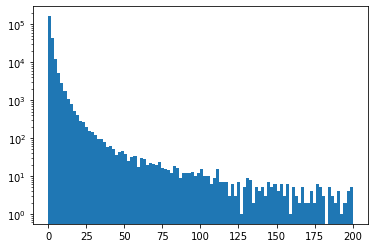

In [19]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

degrees = np.array([full_g.degree(node) for node in full_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=100);
plt.semilogy();

Por ejemplo, acá lo que vemos es que hay 10 usuarios con 200 aristas, es decir, que fueron retwiteados o retwitearon por/de otros 200 usuarios. A la vez, vemos que hay 100000 usuarios (10^5) que no retwitearon ni fueron retwiteados por nadie (al menos por nadie que esté en nuestro dataset)

Ahora vamos a recortar un poco el grafo porque sino va a ser imposible trabajar con algo de semejante tamaño

In [20]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

Esta función se queda con los nodos del grafo que tienen grado mayor a n. Es decir, que fueron retwiteados (o retwitearon) por más de 5 personas. La idea es quedarnos con los que más influenciaron.

In [21]:
g = subgraph_strong_nodes(full_g, 5)

print("Nos quedan {:.2f}M nodos (antes eran {:.2f}M)".format(
    len(g.nodes) / 1e6,
    len(full_g.nodes) / 1e6
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 0.02M nodos (antes eran 0.23M)
Componentes conexas = 901


Que es esto de "componentes conexas"? Un grafo puede no tener todas sus partes conectadas entre sí. Esto puede ser un problema, veamos cuantos usuarios hay en cada componente:

In [22]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} usuarios".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} usuarios".format(sum(resto)))

Componentes conexas = 901
Componente 0  --> 18969  usuarios
Restantes     --> 948    usuarios


O sea que hay una componente con 18969 usuarios y entre todas las otras hay 948 usuarios... Capaz me conviene quedarme sólo con la primera y tirar el resto, así me queda un grafo totalmente conexo con el que puede ser más fácil trabajar

In [67]:
import seaborn as sns

In [23]:
g = g.subgraph(components[0])

In [24]:
g

## Ejercicio 4

Armar los grafos para los otros corpus

## Ejercicio 5

Un grafo se arma estableciendo una relación entre dos cosas y representando esa relación con un eje. Nosotros elegimos relacionar usuarios según si se retwitean entre sí. Pero se pueden elegir otros criterios. Incluso se pueden elegir otras cosas para relacionar entre sí (como por ejemplo, los mismos tweets en si!). Les dejo una función que toma dos tweets y devuelve verdader si los tweets tienen más de n palabras en común y falso si no. Se animan a armar un grafo con esta función? Qué información pueden sacar de este grafo? Escriban un texto no muy extenso contando qué hicieron y cualquier cosa que les parezca interesante del resultado o del proceso

In [25]:
def tienenMasDeNEnComun(tweet1, tweet2, n):
    t1 = set(tweet1.split(" "))
    t2 = set(tweet2.split(" "))
    return len(t1.intersection(t2)) > n

In [26]:
tienenMasDeNEnComun("Juanita tiene un lorito que se llama Pepito", "Pepito es un lorito que tiene plumas", 4)

True

In [27]:
no_retweets = abortion[abortion["tweet.retweeted_status.user.id_str"].isnull()]

In [28]:
no_retweets

,_id,query,tweet.created_at,tweet.id_str,tweet.full_text,tweet.text,tweet.extended_tweet.full_text,tweet.display_text_range,tweet.entities,tweet.user.id_str,...,tweet.retweeted_status.user.friends_count,tweet.retweeted_status.user.listed_count,tweet.retweeted_status.user.favorites_count,tweet.retweeted_status.user.statuses_count,tweet.retweeted_status.user.created_at,tweet.retweeted_status.user.id_str.1,tweet.retweeted_status.user.following,tweet.retweeted_status.retweet_status,tweet.retweeted_status.extended_tweet,full_text
3,ObjectId(5dc083fbe36ea093ac65d1c6),abortion,Mon Nov 04 20:01:47 +0000 2019,1191445455286222852,Writing an essay on what philosophers have to ...,NaN,NaN,"[0,69]","{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",477959459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Writing an essay on what philosophers have to ...
4,ObjectId(5dc083fbe36ea093ac65d1c8),abortion,Mon Nov 04 20:01:46 +0000 2019,1191445453373628416,@rn_gal @OpalescentMoon @realDonaldTrump Killi...,NaN,NaN,"[41,321]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",1030972456620711936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@rn_gal @OpalescentMoon @realDonaldTrump Killi...
9,ObjectId(5dc083fbe36ea093ac65d1d2),abortion,Mon Nov 04 20:01:35 +0000 2019,1191445406388899840,Pro-life people on abortion: all life is innoc...,NaN,NaN,"[0,157]","{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",866805905760899073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pro-life people on abortion: all life is innoc...
18,ObjectId(5dc083fbe36ea093ac65d1e6),abortion,Mon Nov 04 20:01:15 +0000 2019,1191445321844436999,@JimHawk67327371 @ewarren considers abortion a...,NaN,NaN,"[17,295]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",2747109170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@JimHawk67327371 @ewarren considers abortion a...
33,ObjectId(5dc083fbe36ea093ac65d21c),abortion,Mon Nov 04 20:00:28 +0000 2019,1191445126247256072,@liquidrouge Normally I don’t block people but...,NaN,NaN,"[13,154]","{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",1181462655506305024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@liquidrouge Normally I don’t block people but...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613537,ObjectId(5dcdb67bee0a4baf1b071f7e),streaming,Thu Nov 14 20:17:58 +0000 2019,1195073406288506880,NaN,@AmyMcGrathKY What's your plan for reaching al...,@AmyMcGrathKY What's your plan for reaching al...,"[14,140]","{""hashtags"":[],""urls"":[{""url"":""https://t.co/IH...",15078135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@AmyMcGrathKY What's your plan for reaching al...
613544,ObjectId(5dcdb6b3ee0a4baf1b071fe6),streaming,Thu Nov 14 20:18:54 +0000 2019,1195073642079670272,NaN,@blazoak1 @toehole @SpeakerPelosi I'm totally ...,@blazoak1 @toehole @SpeakerPelosi I'm totally ...,"[34,140]","{""hashtags"":[],""urls"":[{""url"":""https://t.co/Qi...",844670928399323136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@blazoak1 @toehole @SpeakerPelosi I'm totally ...
613545,ObjectId(5dcdb6bfee0a4baf1b071ffe),streaming,Thu Nov 14 20:19:06 +0000 2019,1195073692436447232,NaN,If you're interested in seeing how fake women'...,If you're interested in seeing how fake women'...,NaN,"{""hashtags"":[],""urls"":[{""url"":""https://t.co/a4...",15443890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,If you're interested in seeing how fake women'...
613548,ObjectId(5dcdb6c1ee0a4baf1b072004),streaming,Thu Nov 14 20:19:07 +0000 2019,1195073699428352000,NaN,Leana Wen really have the anti-abortion moveme...,NaN,NaN,"{""hashtags"":[],""urls"":[],""user_mentions"":[],""s...",145071750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leana Wen really have the anti-abortion moveme...


In [56]:
import networkx as nx

tweet_g = nx.Graph()
vertex_ids = set()

# primero, recorrer un arreglo con todos los tweets

i=0
for tweet1 in no_retweets["full_text"][:1000]:
#     print("i: "+str(i))
    j=0
    for tweet2 in no_retweets["full_text"][i:1000]:
#         print("j: "+str(j))
        if( tienenMasDeNEnComun(tweet1, tweet2, 10) and (tweet1 != tweet2)):
            tweet_g.add_edge(tweet1,tweet2)  
        j+=1
    i+=1

# mejorar que no repita las comparaciones.             


In [93]:
print(len(no_retweets['full_text'].unique()))
print(len(no_retweets['full_text']))

# no_retweets_unique = no_retweets[no_retweets['full_text'].unique()]

# print(len(no_retweets_unique))

no_retweets['full_text'].unique()

147454
150559


array(['Writing an essay on what philosophers have to say about abortion. Why',
       '@rn_gal @OpalescentMoon @realDonaldTrump Killing a baby after birth is already against the law. \nIf you are talking about abortion ,  There are people in democrats who totally oppose abortion. There republicans who totally support abortion. \nAbortion should not be a deciding factor for the country’s security and dignity',
       'Pro-life people on abortion: all life is innocent and MURDER IS WRONG!!!\n*Rodney Reed is about to be executed for a crime he did not commit*\nPro-life people:',
       ...,
       "If you're interested in seeing how fake women's health centers/crisis pregnancy centers are able to care for women after excluding @PPFA &amp; other abortion providers, check out your home state, @RepChipRoy. (SPOILER: They can't.) https://t.co/8jujbblfIC #ShowMeAccess",
       'Leana Wen really have the anti-abortion movement a beautiful gift for saying the things she did on the way out. Wow.

Estadistic

In [ ]:
no_retweets["full_text"][9:10]

In [57]:
n = len(tweet_g.nodes)
m = len(tweet_g.edges)
complete = n * (n-1) / 2

print("Nodos: {:.0f}".format(n))
print("Ejes: {:.0f}".format(m))

Nodos: 170
Ejes: 372


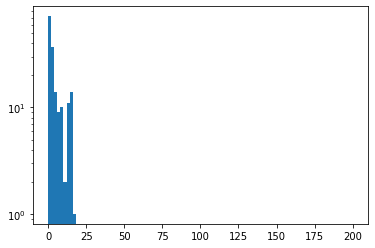

In [58]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

degrees = np.array([tweet_g.degree(node) for node in tweet_g.nodes()])

plt.hist(degrees, range=(0, 200), bins=100);
plt.semilogy();

In [59]:
def subgraph_strong_nodes(g, n):
    """
    Devuelve subgrafo con nodos de grado mayor a n
    """
    good_nodes = [node for node in g.nodes() if g.degree(node) >= n]
    
    return g.subgraph(good_nodes)

In [81]:
g = subgraph_strong_nodes(tweet_g, 10)

print("Nos quedan {:.2f}M nodos (antes eran {:.2f}M)".format(
    len(g.nodes) / 1e6,
    len(tweet_g.nodes) / 1e6
))
print("Componentes conexas = {}".format(len(list(nx.connected_components(g)))))

Nos quedan 0.00M nodos (antes eran 0.00M)
Componentes conexas = 2


In [82]:
components = list(nx.connected_components(g))

print("Componentes conexas = {}".format(len(components)))

print("Componente 0  --> {:<6} usuarios".format(len(components[0])))

resto = [len(components[i]) for i in range(1, len(components))]
print("Restantes     --> {:<6} usuarios".format(sum(resto)))

Componentes conexas = 2
Componente 0  --> 13     usuarios
Restantes     --> 15     usuarios


In [83]:
g = g.subgraph(components[0])

# Graficando

Esta parte la idea es que sea **optativa** según cómo lleguen con el resto. Si lo llegan a hacer mejor! Si no, no hay drama. Para graficar la idea es usar un programita que se llama Gephi: https://gephi.org/.
***Warning*** GEPHI CONSUME MUCHA MEMORIA ***Warning***
Así que poden bien sus grafos

La libreria que usamos para generar el grafo (networkx) tiene un comando que exporta un archivo para ser importado en Gephi:

In [84]:
nx.write_gexf(g, "test.gexf")

Apenas cargen su grafo van a ver todos los nodos apelotonados en forma de cuadrado en el medio. A la izquierda pueden elegir algún algoritmo de distribución y ejecutarlo. Este algoritmo les va a esparcir los nodos de distintas formas y según distintos criterios. También a la izquierda pero arriba pueden elegir cambiar la apariencia de los nodos y/o las aristas. A mi algo que me parece que siempre queda bien es setear el tamaño de los nodos según el PageRank. El PageRank indica muy a grandes razgos, la centralidad de un nodo (cuantos caminos entre dos nodos distintos tienen que pasar sí o sí por ahi). Por lo tanto, si están graficando usuarios, por ejemplo, el PageRank es cuan central (o "influencer" ponele) es el usuario. Si el tamaño depende del PageRank, los nodos más grandes van a ser los "influencers". En el Gephi tienen mil cosas para explorar, jueguen un poco y vean qué les gusta y muestrenlo!